In [14]:
#ACF and PACF

In [15]:
#Importing Necessary Libraries
import pandas as pd
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [16]:
#Plot the Data
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/AirPassengers.csv')
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


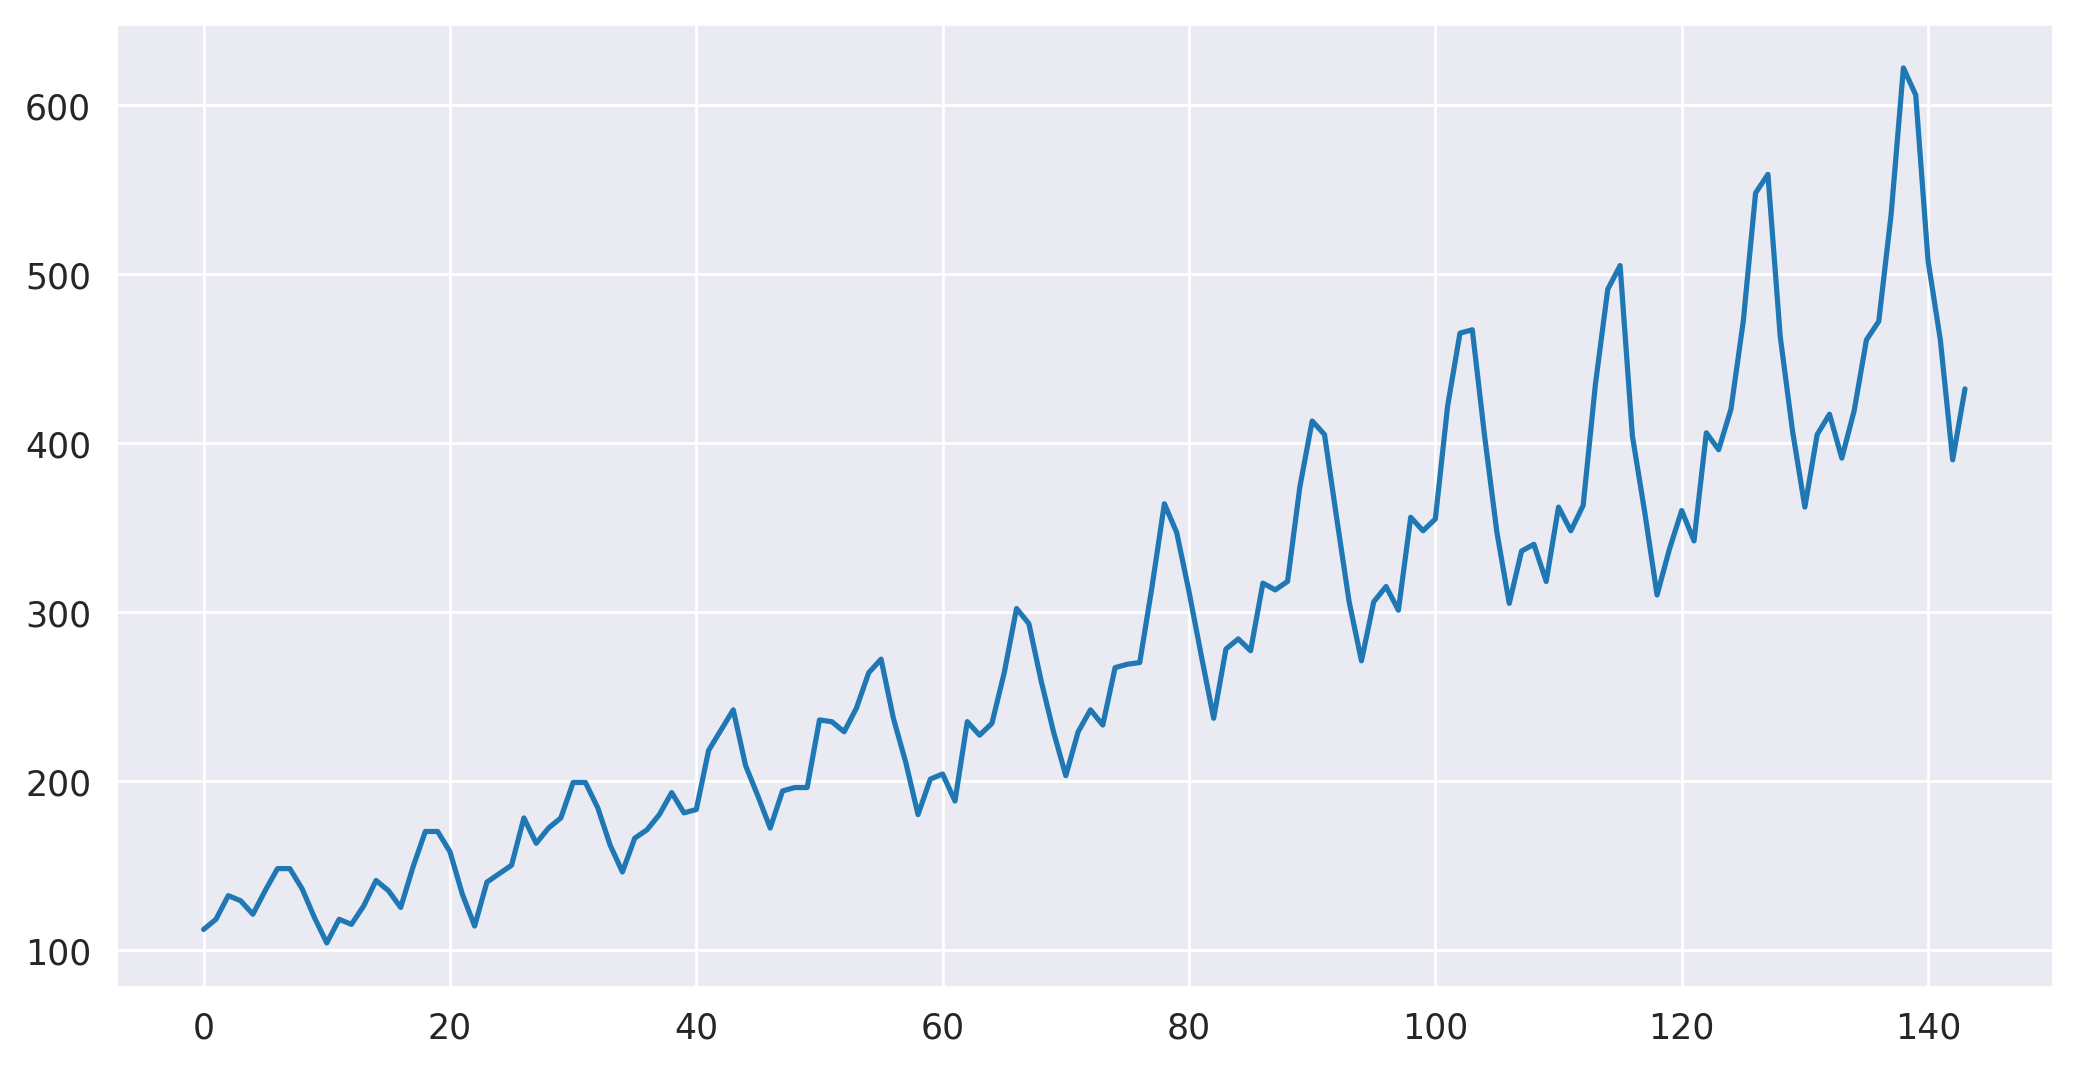

In [18]:
plt.plot(df['Passengers'])

In [19]:
#First Order Difference
df['First-Order'] = df['Passengers'].diff(periods=1)
df

,Month,Passengers,First-Order
0,1949-01,112,NaN
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0
...,...,...,...
139,1960-08,606,-16.0
140,1960-09,508,-98.0
141,1960-10,461,-47.0
142,1960-11,390,-71.0


In [20]:
#Drop na
df.dropna(inplace=True)
df

,Month,Passengers,First-Order
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0
5,1949-06,135,14.0
...,...,...,...
139,1960-08,606,-16.0
140,1960-09,508,-98.0
141,1960-10,461,-47.0
142,1960-11,390,-71.0


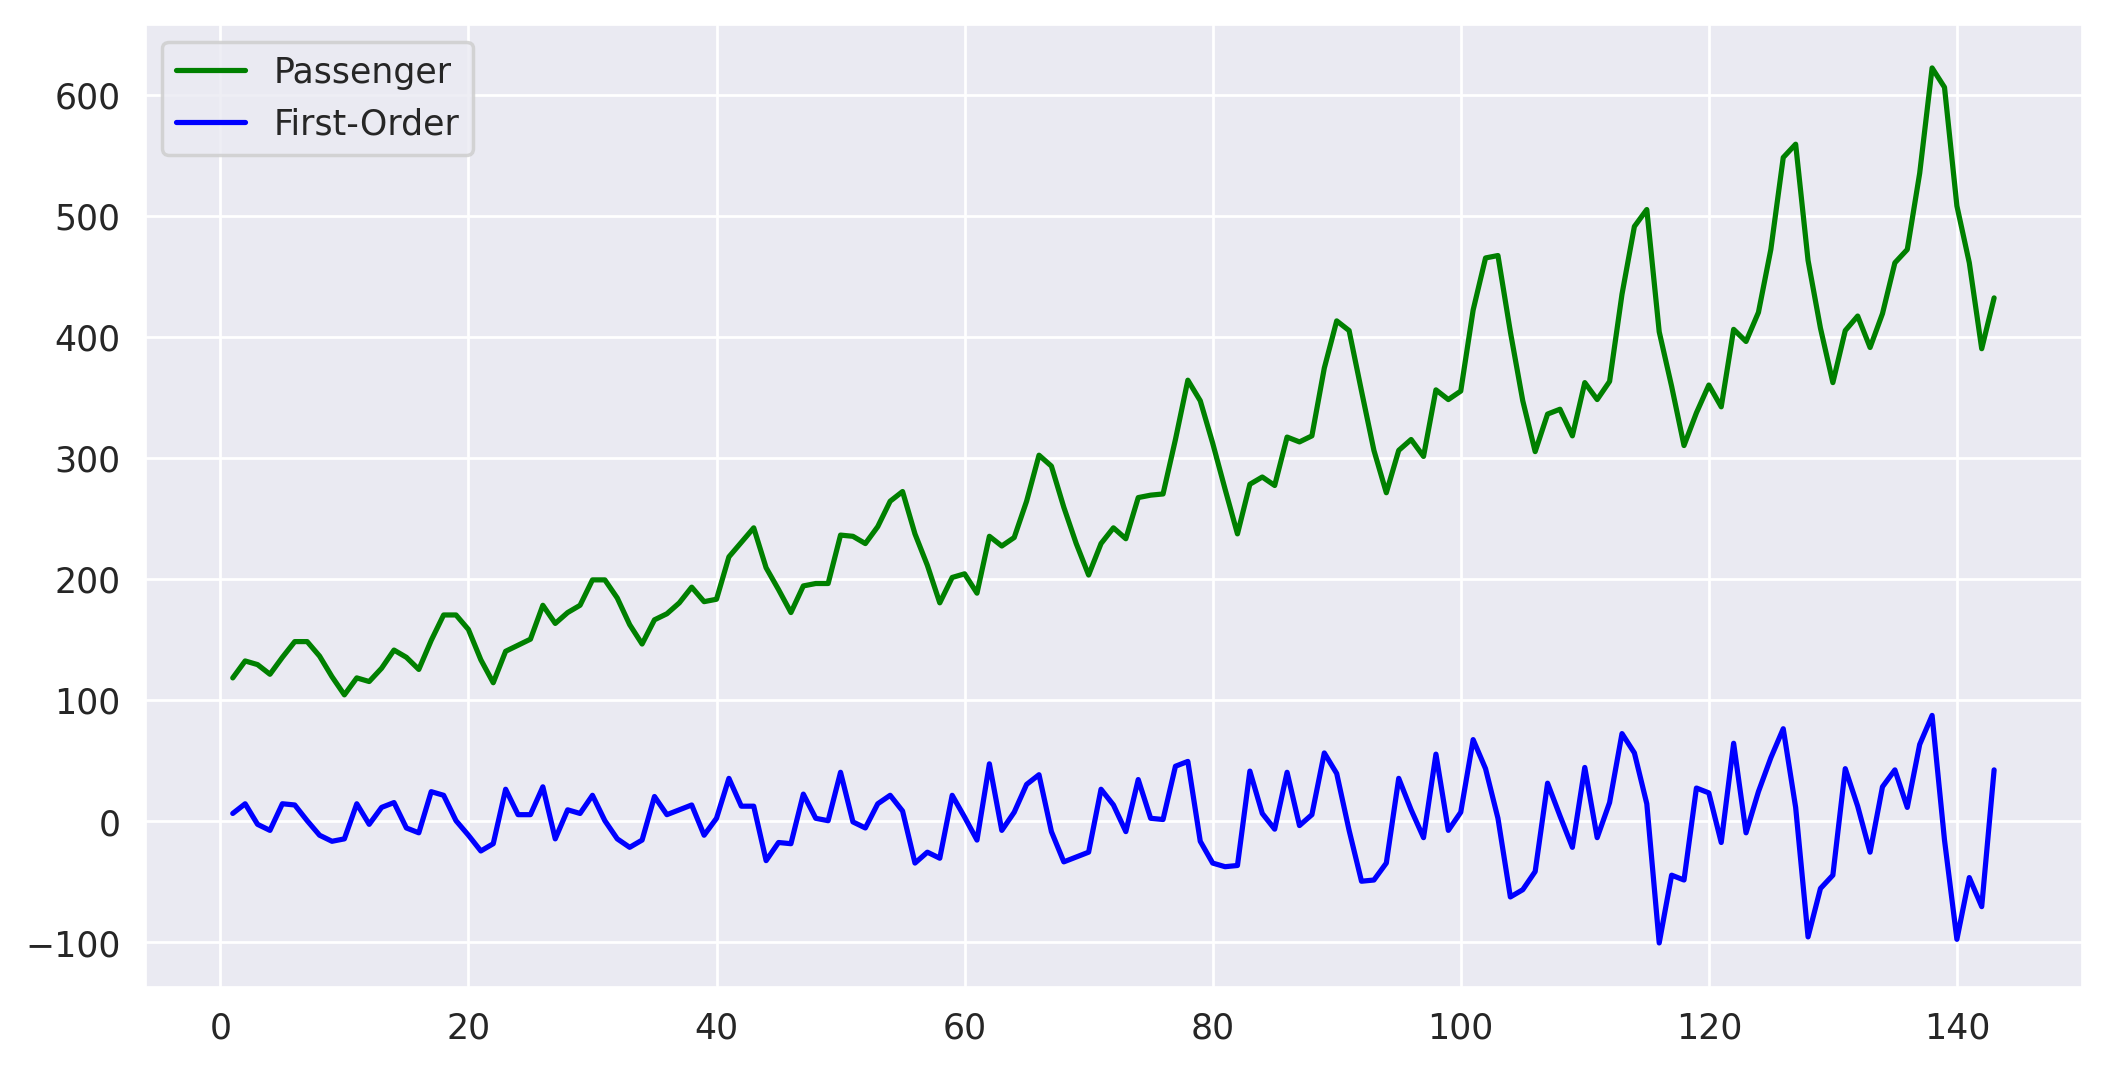

In [21]:
#Plot
plt.plot(df['Passengers'],color='green',label='Passenger')
plt.plot(df['First-Order'],color='blue',label='First-Order')
plt.legend()

In [22]:
#Calculate Autocorrection
acf_values = acf(df['First-Order'])
acf_values

array([ 1.        ,  0.30285526, -0.10214755, -0.24127349, -0.30040158,
       -0.09407271, -0.07844257, -0.0923622 , -0.29480158, -0.19177821,
       -0.10491707,  0.28293105,  0.82917786,  0.28450079, -0.10575172,
       -0.22213093, -0.23107603, -0.06227904, -0.06618505, -0.09039973,
       -0.29710958, -0.16273198])

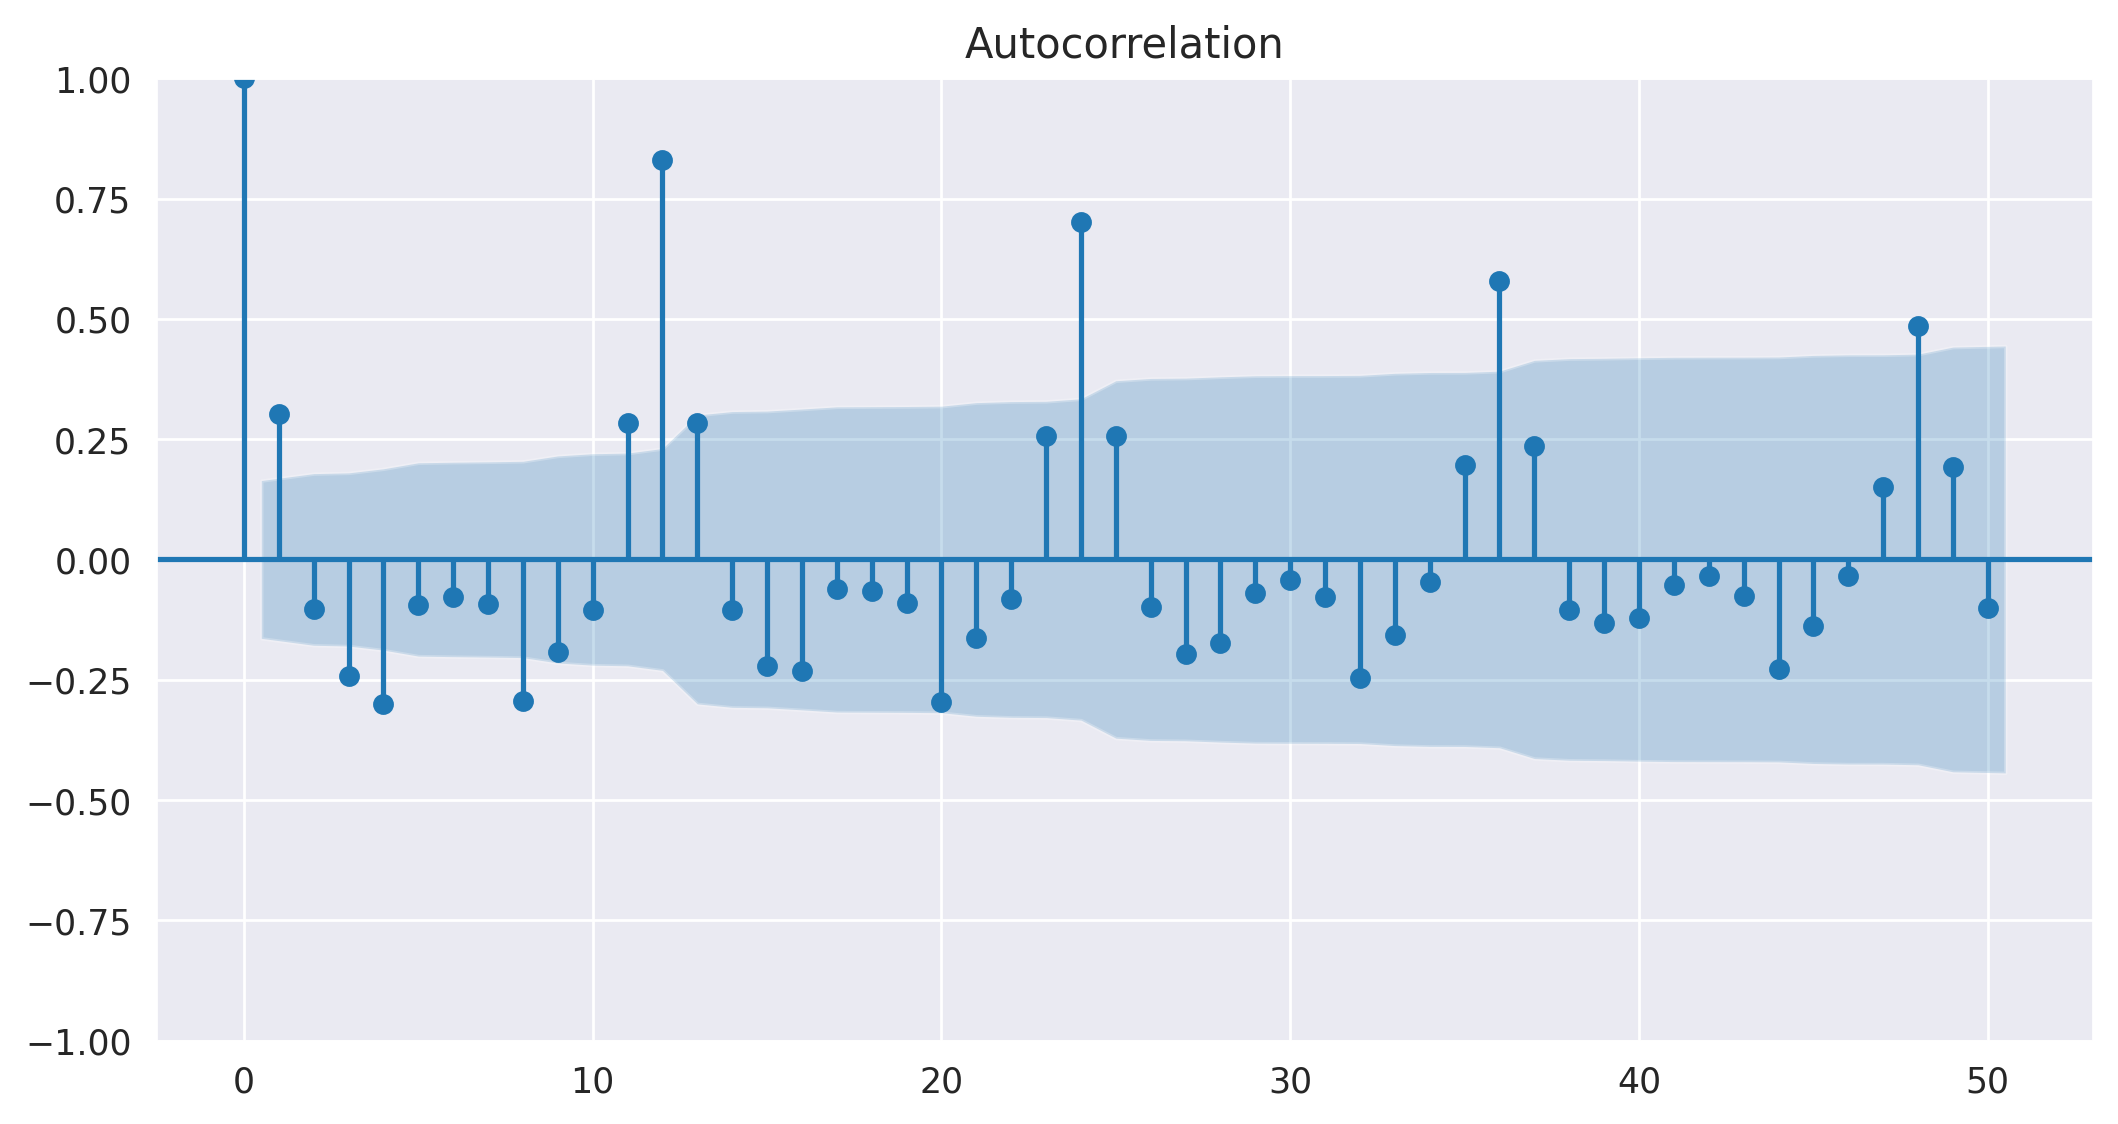

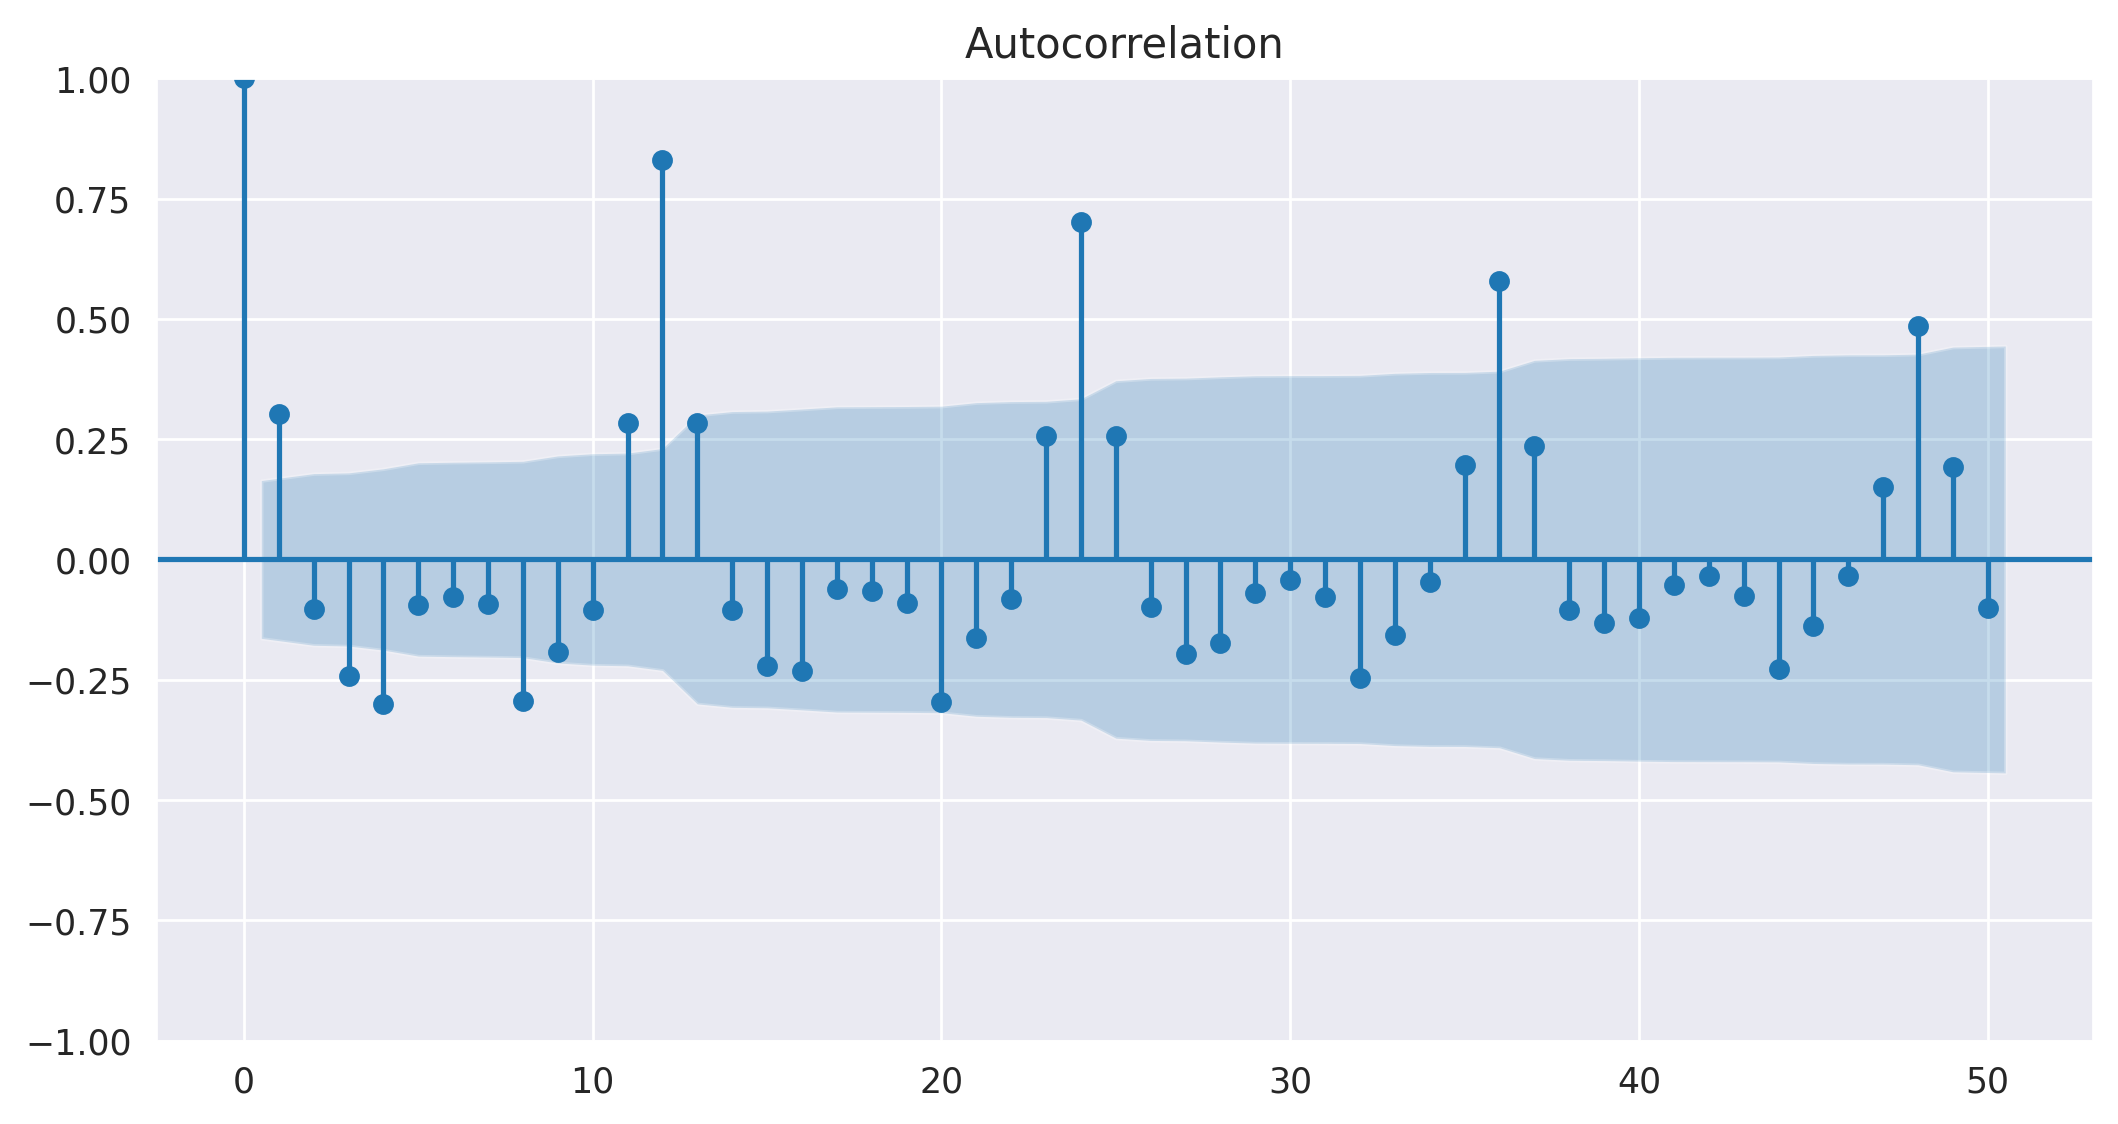

In [23]:
#Plot ACF
plot_acf(df['First-Order'],lags=50)

In [24]:
#Calculate PACF
pacf_val = pacf(df['First-Order'])
pacf_val

array([ 1.        ,  0.30498804, -0.21677838, -0.16414895, -0.22880726,
        0.0102048 , -0.20039114, -0.16381118, -0.4908729 , -0.27906007,
       -0.67292181, -0.41858338,  0.60762779, -0.05342571, -0.30073394,
        0.02024145,  0.13861772,  0.09074817, -0.12191529,  0.01046262,
       -0.21763101, -0.12181244])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


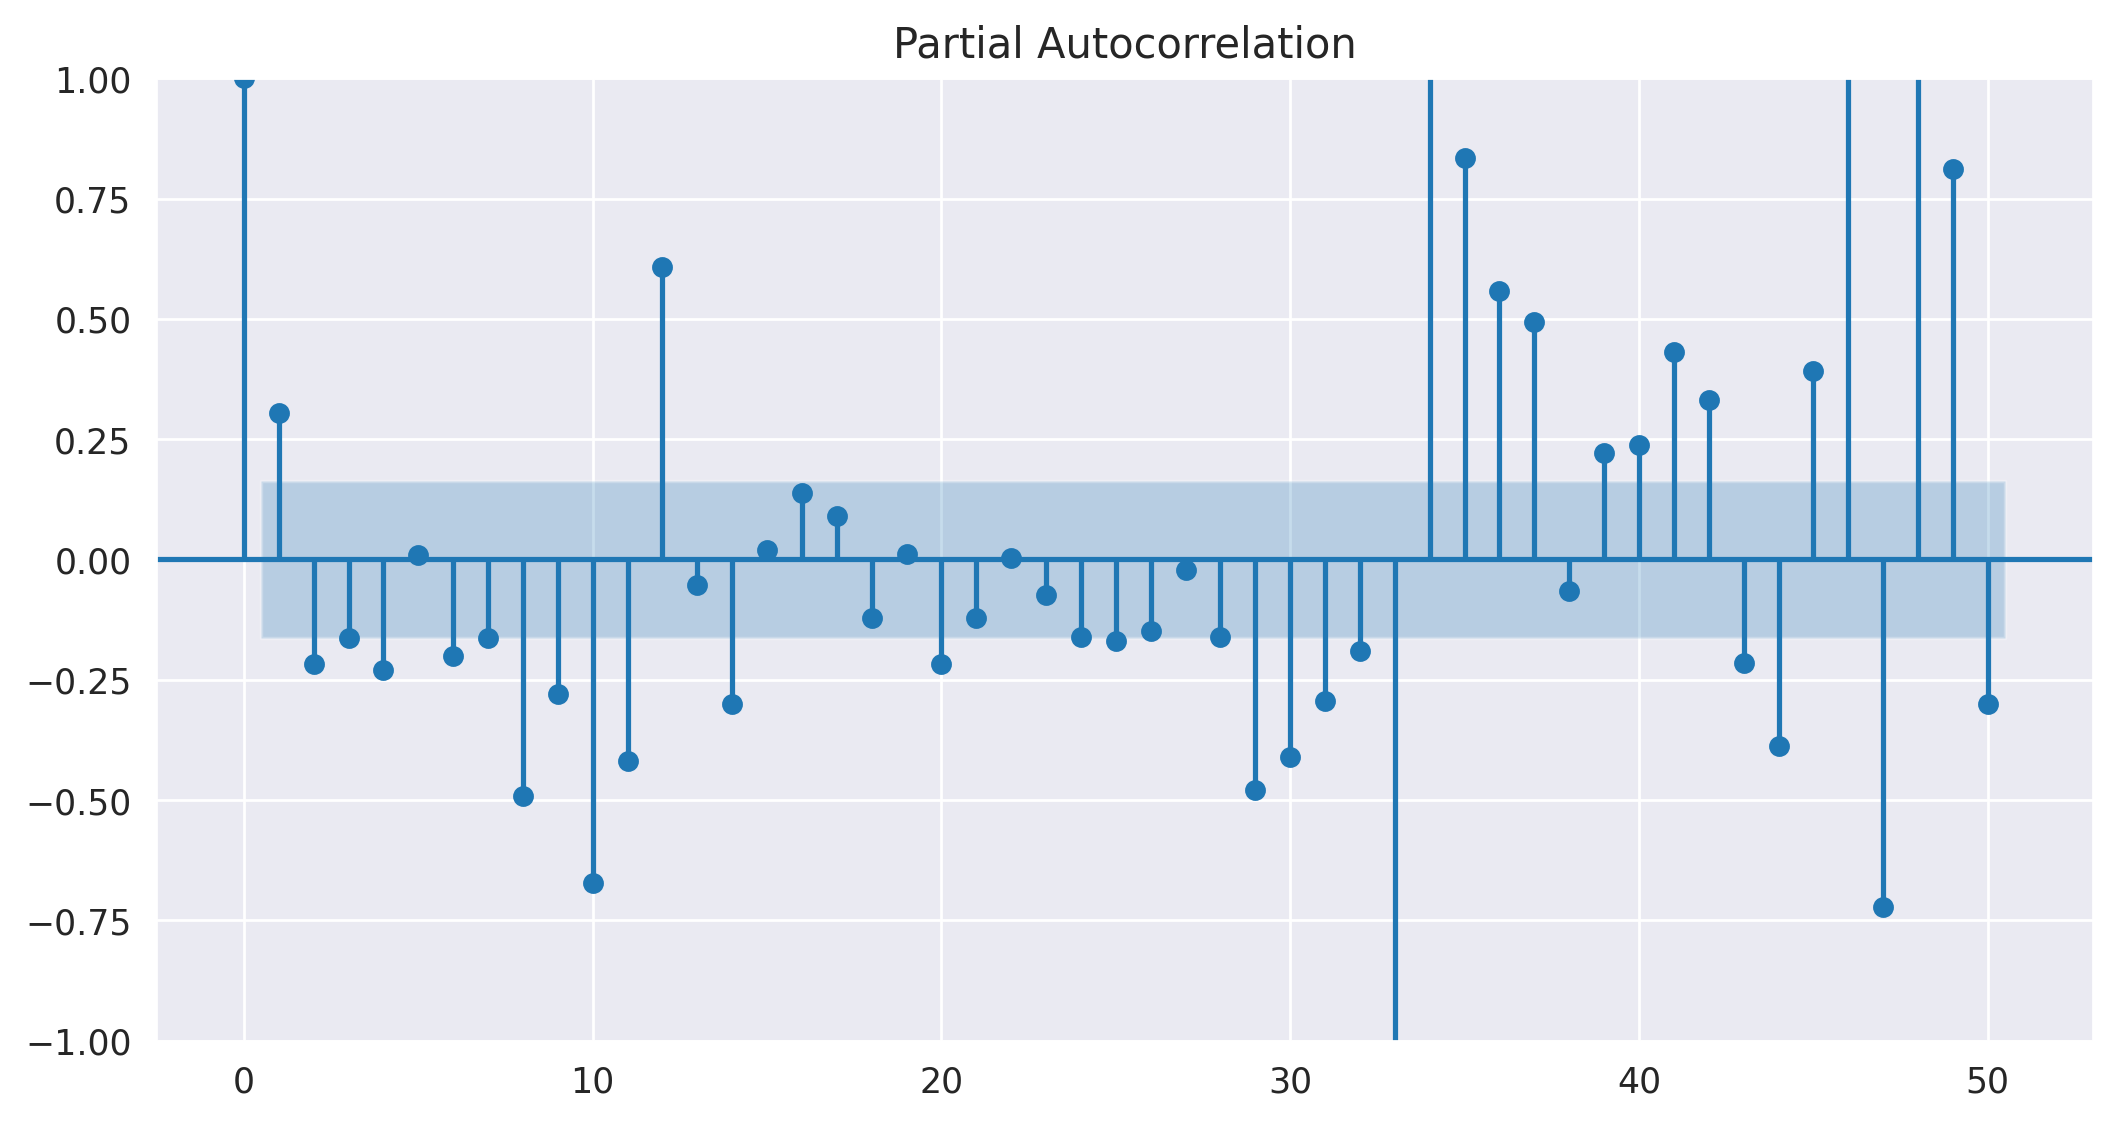

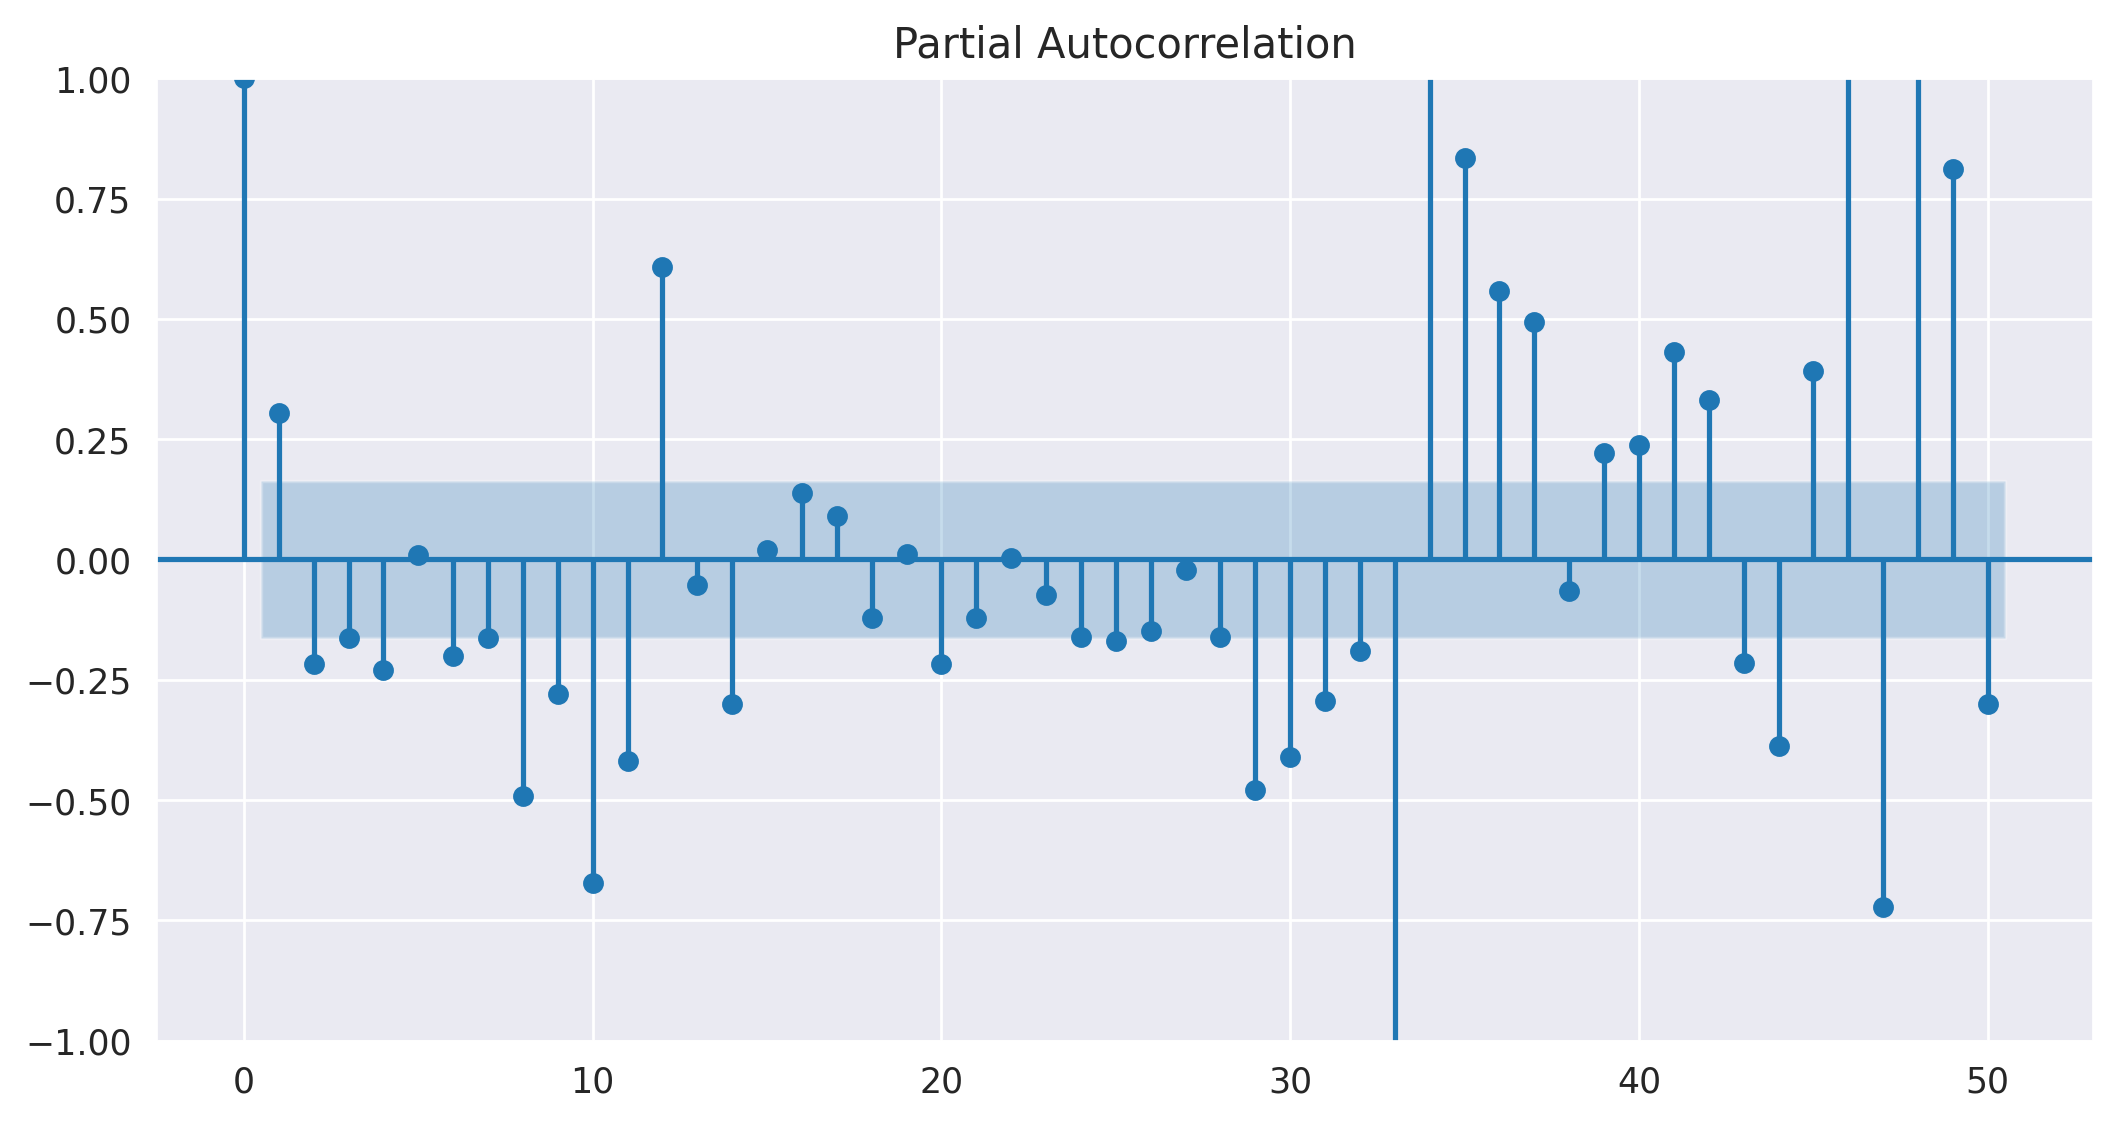

In [25]:
#Plot PACF
plot_pacf(df['First-Order'],lags=50)